In [1]:
!pip install matplotlib
!pip install statsmodels

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

covidtotals = pd.read_csv('data/covidtotals.csv')
covidtotals.set_index('iso_code', inplace=True)

In [2]:
xvars = ['pop_density', 'median_age', 'gdp_per_capita']
covidanalysis = covidtotals.loc[:, ['total_cases_pm'] + xvars].dropna()
covidanalysis.describe()

,total_cases_pm,pop_density,median_age,gdp_per_capita
count,180.000000,180.000000,180.000000,180.000000
mean,167765.187317,204.279356,30.186667,18290.378528
std,190964.668921,631.463653,9.044017,19391.732764
min,354.487000,1.980000,15.100000,661.240000
25%,11930.736750,35.811250,22.150000,3789.708250
50%,92973.106500,82.024500,29.350000,11822.138500
75%,263162.412750,204.787250,38.400000,26785.211750
max,763475.441000,7915.731000,48.200000,116935.600000


In [3]:
def getlm(df):
    Y = df.total_cases_pm
    X = df[['pop_density','median_age','gdp_per_capita']]
    X = sm.add_constant(X)
    return sm.OLS(Y, X).fit()

lm = getlm(covidanalysis)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_cases_pm   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     95.70
Date:                Tue, 20 May 2025   Prob (F-statistic):           8.92e-37
Time:                        17:11:02   Log-Likelihood:                -2356.6
No. Observations:                 180   AIC:                             4721.
Df Residuals:                     176   BIC:                             4734.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.382e+05   3.41e+04     -6.980      0.000   -3.06e+05   -1.71e+05
pop_density       12.4060     14.664      0.846      0.399     -16.534      41.346
median_age      1.157e+04   1291.446      8.956      0.000    9016.897    1.41e+04
gdp_per_capita     2.9674      0.621      4.777      0.000       1.741       4.193
==============================================================================
Omnibus:                       24.567   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.258
Skew:                           0.746   Prob(JB):                     4.93e-09
Kurtosis:                       4.696   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
influence = lm.get_influence().summary_frame()
influence.loc[influence.cooks_d > 0.5, ['cooks_d']]

,cooks_d
iso_code,
QAT,0.703305
SGP,3.116386


In [5]:
covidanalysis.loc[influence.cooks_d > 0.5]

,total_cases_pm,pop_density,median_age,gdp_per_capita
iso_code,,,,
QAT,190908.716,227.322,31.9,116935.600
SGP,531183.841,7915.731,42.4,85535.383


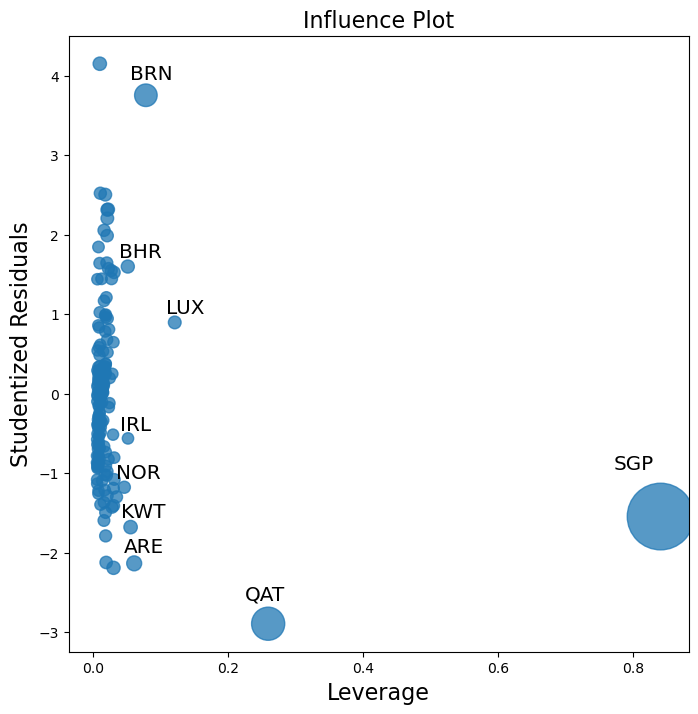

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
sm.graphics.influence_plot(lm, ax = ax, alpha=5, criterion="cooks")
plt.show()

In [7]:
covidanalysisisminusoutliers = covidanalysis.loc[influence.cooks_d < 0.5]
lm = getlm(covidanalysisisminusoutliers)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_cases_pm   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     101.5
Date:                Tue, 20 May 2025   Prob (F-statistic):           5.20e-38
Time:                        17:40:50   Log-Likelihood:                -2325.7
No. Observations:                 178   AIC:                             4659.
Df Residuals:                     174   BIC:                             4672.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.158e+05   3.43e+04     -6.288      0.000   -2.83e+05   -1.48e+05
pop_density       61.2396     34.260      1.788      0.076      -6.378     128.858
median_age      9968.5170   1346.416      7.404      0.000    7311.107    1.26e+04
gdp_per_capita     4.1112      0.704      5.841      0.000       2.722       5.500
==============================================================================
Omnibus:                       21.017   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.687
Skew:                           0.639   Prob(JB):                     4.84e-08
Kurtosis:                       4.706   Cond. No.                     9.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""